In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [3]:
#unzip the dog-vs-cat file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generator-devide the data into batches for fast processing large amount of data
train_data=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_data=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#these images are stored in the form of numpy array and every value of this numpy varry from 0-256
#so we need to normalize it in 0-1
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

In [7]:
#Create CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.2458 - accuracy: 0.5948 - val_loss: 0.6377 - val_accuracy: 0.6548
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5554 - accuracy: 0.7200 - val_loss: 0.5926 - val_accuracy: 0.6712
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4676 - accuracy: 0.7822 - val_loss: 0.7160 - val_accuracy: 0.6084
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4058 - accuracy: 0.8156 - val_loss: 0.5373 - val_accuracy: 0.7536
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3531 - accuracy: 0.8471 - val_loss: 0.4165 - val_accuracy: 0.8098
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2698 - accuracy: 0.8877 - val_loss: 0.4993 - val_accuracy: 0.8012
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1886 - accuracy: 0.9238 - val_loss: 0.4986 - val_ac

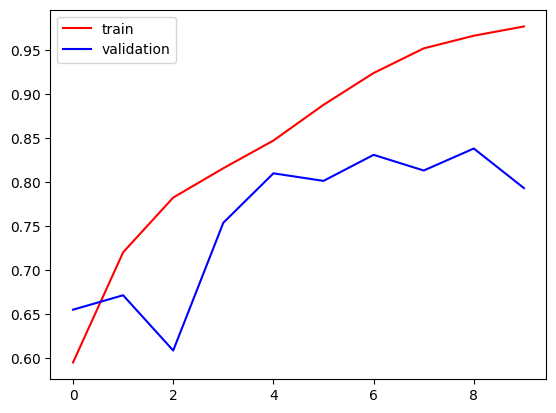

In [11]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

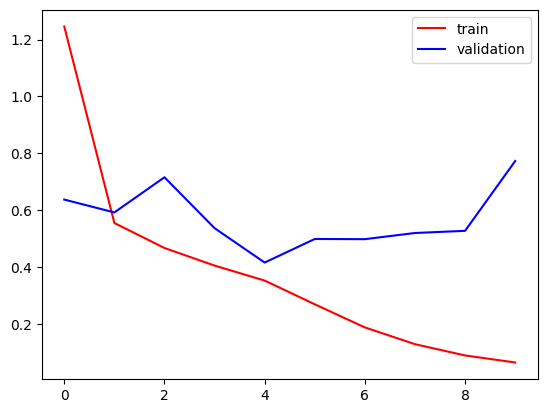

In [12]:
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [13]:
#Prediction on new images

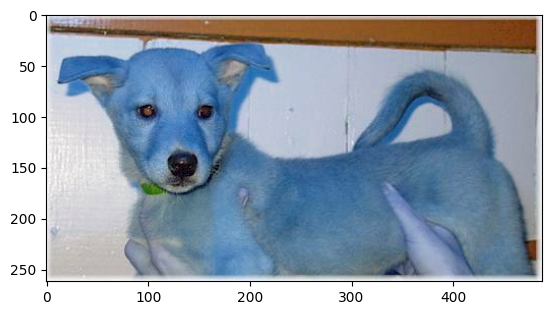

In [22]:
import cv2
test_img=cv2.imread('/content/dog.94.jpg')
plt.imshow(test_img)
plt.show()

In [23]:
test_img.shape

(262, 488, 3)

In [24]:
test_img=cv2.resize(test_img,(256,256))

In [25]:
test_input=test_img.reshape((1,256,256,3))

In [30]:

import numpy as np

# Assuming this is the output from model.predict(test_input)
prediction = model.predict(test_input)

# Check the value and print the corresponding label
if prediction[0][0] == 1:
    print("dog image")
else:
    print("cat image")


1/1 [==============================] - 0s 27ms/step
dog image
